In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
#from nltk.stem.snowball import SnowballStemmers

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



C:\Users\Justin\AppData\Local\Temp\ipykernel_16020\1046186678.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read yelp.csv into a DataFrame
df_yelp = pd.read_csv('../data/yelp.csv')
print(df_yelp.shape)
df_yelp.head()

(10000, 10)


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
df_yelp.nunique()

business_id     4174
date            1995
review_id      10000
stars              5
text            9998
type               1
user_id         6403
cool              29
useful            28
funny             29
dtype: int64

In [4]:
df_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
df_yelp.stars.value_counts()

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64

In [6]:
df_yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
df_yelp_best_worst = df_yelp[(df_yelp.stars==5) | (df_yelp.stars==1)]
print(df_yelp_best_worst.shape)
df_yelp_best_worst.head()

(4086, 10)


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [8]:
df_yelp_best_worst.stars.value_counts()

stars
5    3337
1     749
Name: count, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_yelp_best_worst.text, df_yelp_best_worst.stars, random_state=1)

In [10]:
print(X_train.shape)
X_train.head()

(3064,)


6841    FILLY-B's!!!!!  only 8 reviews?? NINE now!!!\r...
1728    My husband and I absolutely LOVE this restaura...
3853    We went today after lunch. I got my usual of l...
671     Totally dissapointed.  I had purchased a coupo...
4920    Costco Travel - My husband and I recently retu...
Name: text, dtype: object

In [11]:
print(y_train.shape)
y_train.head()

(3064,)


6841    5
1728    5
3853    5
671     1
4920    5
Name: stars, dtype: int64

In [12]:
# Use CountVectorizer to create document-term matrices from X_train and X_test 
# i.e., convert a collection of text documents to a matrix of token counts
vect = CountVectorizer()

# Vectorize the data
train_dtm = vect.fit_transform(X_train)  # learn the vocabulary dictionary and return document-term matrix. fit() learns the vocabulary(learning patterns. patterns are counts). you use fit() on train data because it's larger
test_dtm = vect.transform(X_test)        # transform to document-term matrix based on the vocabulary learned during the fitting. It is counting what terms show up. fit() isnt used here because we already trained on the data

In [13]:
# rows are documents, columns are terms (aka "tokens" or "features")
train_dtm.shape

(3064, 16825)

In [14]:
# Use Naive Bayes to predict the star rating.  The Naive Bayes classifier is used for classification with discrete features 
# (e.g., word counts for text classification)
nb = MultinomialNB() # create nb variable with MultinomialNB() function
nb.fit(train_dtm, y_train) # fit classifier to training data. fit() is learning the vocabulary.
y_pred = nb.predict(test_dtm) # predict star ratings and store in y_pred variable

In [34]:
train_dtm

<3064x16825 sparse matrix of type '<class 'numpy.int64'>'
	with 237720 stored elements in Compressed Sparse Row format>

In [16]:
# Calculate accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.9187866927592955


In [17]:
# Calculate null accuracy:  accuracy that could be achieved by always predicting the most frequent class
# We must always compare with this in a classification experiment
y_test_binary = np.where(y_test==5, 1, 0)
y_test_binary.mean()

0.8199608610567515

Calculate the AUC

Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
1. Make sure to pass the predicted probabilities to roc_auc_score, not the predicted classes.
1. roc_auc_score() will get confused if y_test contains ones and fives, so you will need to create a new object that contains  zeros and ones instead.

* The AUC measures the ability of the model to distinguish between the positive & negative classes.
* The higher the AUC, the better performance of the model at distinguishing between them.

In [18]:
#from sklearn.metrics import roc_auc_score

# Calculate the AUC
#auc = roc_auc_score(y_test, y_pred)

#print(f"The AUC is: {auc}")


In [19]:
from sklearn.metrics import roc_auc_score
 
# Predict the probabilities of the test data
y_pred_prob = nb.predict_proba(test_dtm)[:, 1]  # the probability of the positive class (5 stars)
 
# Convert y_test to binary since roc_auc_score cannot use 1s and 5s
# 1 star is the negative class (0) and 5 stars is the positive class (1)
y_test_binary = (y_test == 5).astype(int)
 
# Calculate the AUC from the predicted probabilities and the binary y_test
auc = roc_auc_score(y_test_binary, y_pred_prob)
 
# Print the AUC
print(f"AUC: {auc}")

AUC: 0.9391635104285566


### Plot the ROC curve

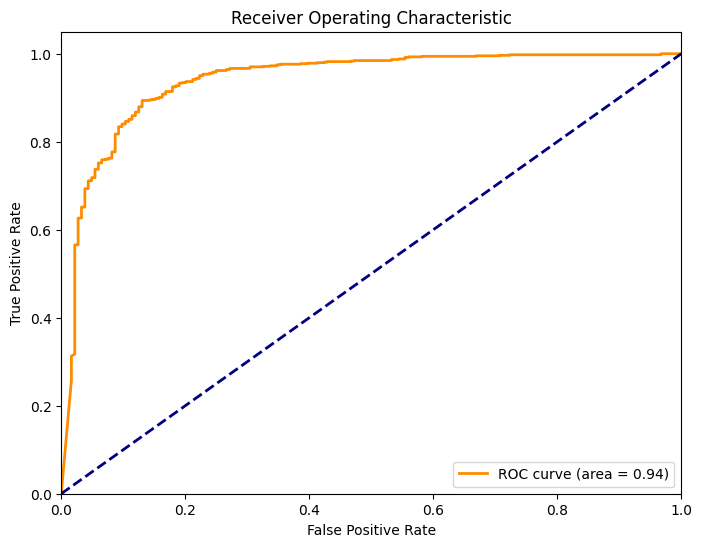

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate the data for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)

# Calculate the AUC (Area under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Print the confusion matrix, and calculate sensitivity, specificity, and precision

For both the test and training datasets.  So, print two separate confusion matrices.  For the training dataset, you'll be making predictions on the vectorized X_train data, and then comparing the training predictions against the ground truth.

In [21]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

### Test Dataset

In [22]:
# nb is our model and 'test_dtm' is our X_test vectorized
test_predictions = nb.predict(test_dtm)

# Generate the confusion matrix for the test dataset
test_conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix for Test Dataset:")
print(test_conf_matrix)

# assign variables to our TP, TN, FP, FN
TP_test = test_conf_matrix[1, 1]
TN_test = test_conf_matrix[0, 0]
FP_test = test_conf_matrix[0, 1]
FN_test = test_conf_matrix[1, 0]

# doing the math with our decalred variables
sensitivity_test = TP_test / float(TP_test + FN_test)
specificity_test = TN_test / float(TN_test + FP_test)
precision_test = precision_score(y_test, test_predictions)  # Using sklearn function for precision

# printing our math results
print(f"Sensitivity (Recall) for Test Dataset: {sensitivity_test}")
print(f"Specificity for Test Dataset: {specificity_test}")
print(f"Precision for Test Dataset: {precision_test}")
# matrix layout
# TP FN precision
# FP TN recall


Confusion Matrix for Test Dataset:
[[126  58]
 [ 25 813]]
Sensitivity (Recall) for Test Dataset: 0.9701670644391408
Specificity for Test Dataset: 0.6847826086956522
Precision for Test Dataset: 0.8344370860927153


### Training Dataset

In [23]:
# nb is our model and 'train_dtm' is our X_train vectorized
predictions = nb.predict(train_dtm)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_train, predictions)
print("Confusion Matrix for Training Dataset:")
print(conf_matrix)

# assign variables to our TP, TN, FP, FN
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# doing the math with our declared variables
sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)
precision = precision_score(y_train, predictions)  # Using sklearn function for precision

print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")

Confusion Matrix for Training Dataset:
[[ 509   56]
 [  27 2472]]
Sensitivity (Recall): 0.9891956782713085
Specificity: 0.9008849557522124
Precision: 0.9496268656716418


### Browse the review text for the false positive and false negatives

In [24]:
# Reviews that were incorrectly classified as 5-star
false_positives = X_test[(y_test == 1) & (y_pred == 5)]
 
# Reviews that were incorrectly classified as 1-star
false_negatives = X_test[(y_test == 5) & (y_pred == 1)]
 
print("False Positives Examples:")
print(false_positives.head())
 
print("\nFalse Negatives Examples:")
print(false_negatives.head())

False Positives Examples:
2175    This has to be the worst restaurant in terms o...
1781    If you like the stuck up Scottsdale vibe this ...
2674    I'm sorry to be what seems to be the lone one ...
9984    Went last night to Whore Foods to get basics t...
3392    I found Lisa G's while driving through phoenix...
Name: text, dtype: object

False Negatives Examples:
7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
Name: text, dtype: object


### Change the threshold to balance sensitivity and specificity

In the performance metrics of the training dataset.

In [25]:
# need y_train in binary to use with roc_curve()
y_train_binary = (y_train == 5).astype(int)

model = LogisticRegression()
model.fit(train_dtm, y_train_binary)

# Predict probabilities for the positive class (5-star reviews)
probabilities = model.predict_proba(train_dtm)[:, 1]

# Calculate ROC curve which gives us sensitivity and specificity at all thresholds
fpr, tpr, thresholds = roc_curve(y_train_binary, probabilities)

# Calculate Youden's J statistic to identify the best threshold
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

# Apply the optimal threshold to convert probabilities to binary predictions
adjusted_predictions = (probabilities >= optimal_threshold).astype(int)

# Now you can generate a confusion matrix and calculate performance metrics using adjusted_predictions

Optimal Threshold: 0.7387611845418164


### Assign sentiment classes

Restricting the training and test datasets solely to 1- and 5-star reviews may be overly restrictive, leading to a reduction in the quantity of data available for model training and evaluation. Considering a broader range of reviews could provide a more comprehensive understanding of the data and potentially enhance the model's ability to generalize across various sentiments and rating levels.

For each review in the DataFrame, assign the sentiment class to split the reviews on positive or negative, and create a target label.
* rating = 4.0 and 5.0 --> class = 1
* rating < 2.0 --> class = 0
* rating = 3.0 --> do not include, neutral assessment

The final DataFrame should only have the following columns:  ['date', 'stars', 'text', 'sentiment'], and display the last 15 reviews in the DataFrame.

In [26]:
df_yelp['sentiment'] = df_yelp['stars'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else None))
df_yelp = df_yelp.dropna(subset=['sentiment'])  # Removes neutral(3 star) reviews.

#creates a new dataframe with only the requiered columns
df_yelp_sentiment = df_yelp[['date', 'stars', 'text', 'sentiment']]
df_yelp_sentiment.tail(15)


,date,stars,text,sentiment
9984,2012-02-12,1,Went last night to Whore Foods to get basics t...,0.0
9985,2012-10-17,4,Awesome food! Little pricey but delicious. Lov...,1.0
9986,2012-03-31,4,I came here in December and look forward to my...,1.0
9987,2012-04-07,1,The food is delicious. The service: discrimi...,0.0
9988,2012-06-02,4,For our first time we had a great time! Our se...,1.0
9989,2011-10-01,5,Great food and service! Country food at its best!,1.0
9990,2011-10-03,5,Yes I do rock the hipster joints. I dig this ...,1.0
9991,2011-12-05,5,Only 4 stars? \r\n\r\n(A few notes: The folks ...,1.0
9992,2009-03-10,5,I'm not normally one to jump at reviewing a ch...,1.0
9993,2011-06-27,4,"Judging by some of the reviews, maybe I went o...",1.0
